# AI 사례실습과 함께하는 '드래곤볼'을 찾아서, 머신러닝!
* 드래곤볼 7개를 모으면 3가지 선물이 주어진다고 합니다.
* AI 모델링 A부터 Z까지의 각 과정에 드래곤볼이 숨겨져있다고 하는데요.
* 우리는 이제 세 번째 마을 '머신러닝' 마을에 도착했습니다.
* 그럼, 지금부터 세 번째 드래곤볼을 찾아볼까요?

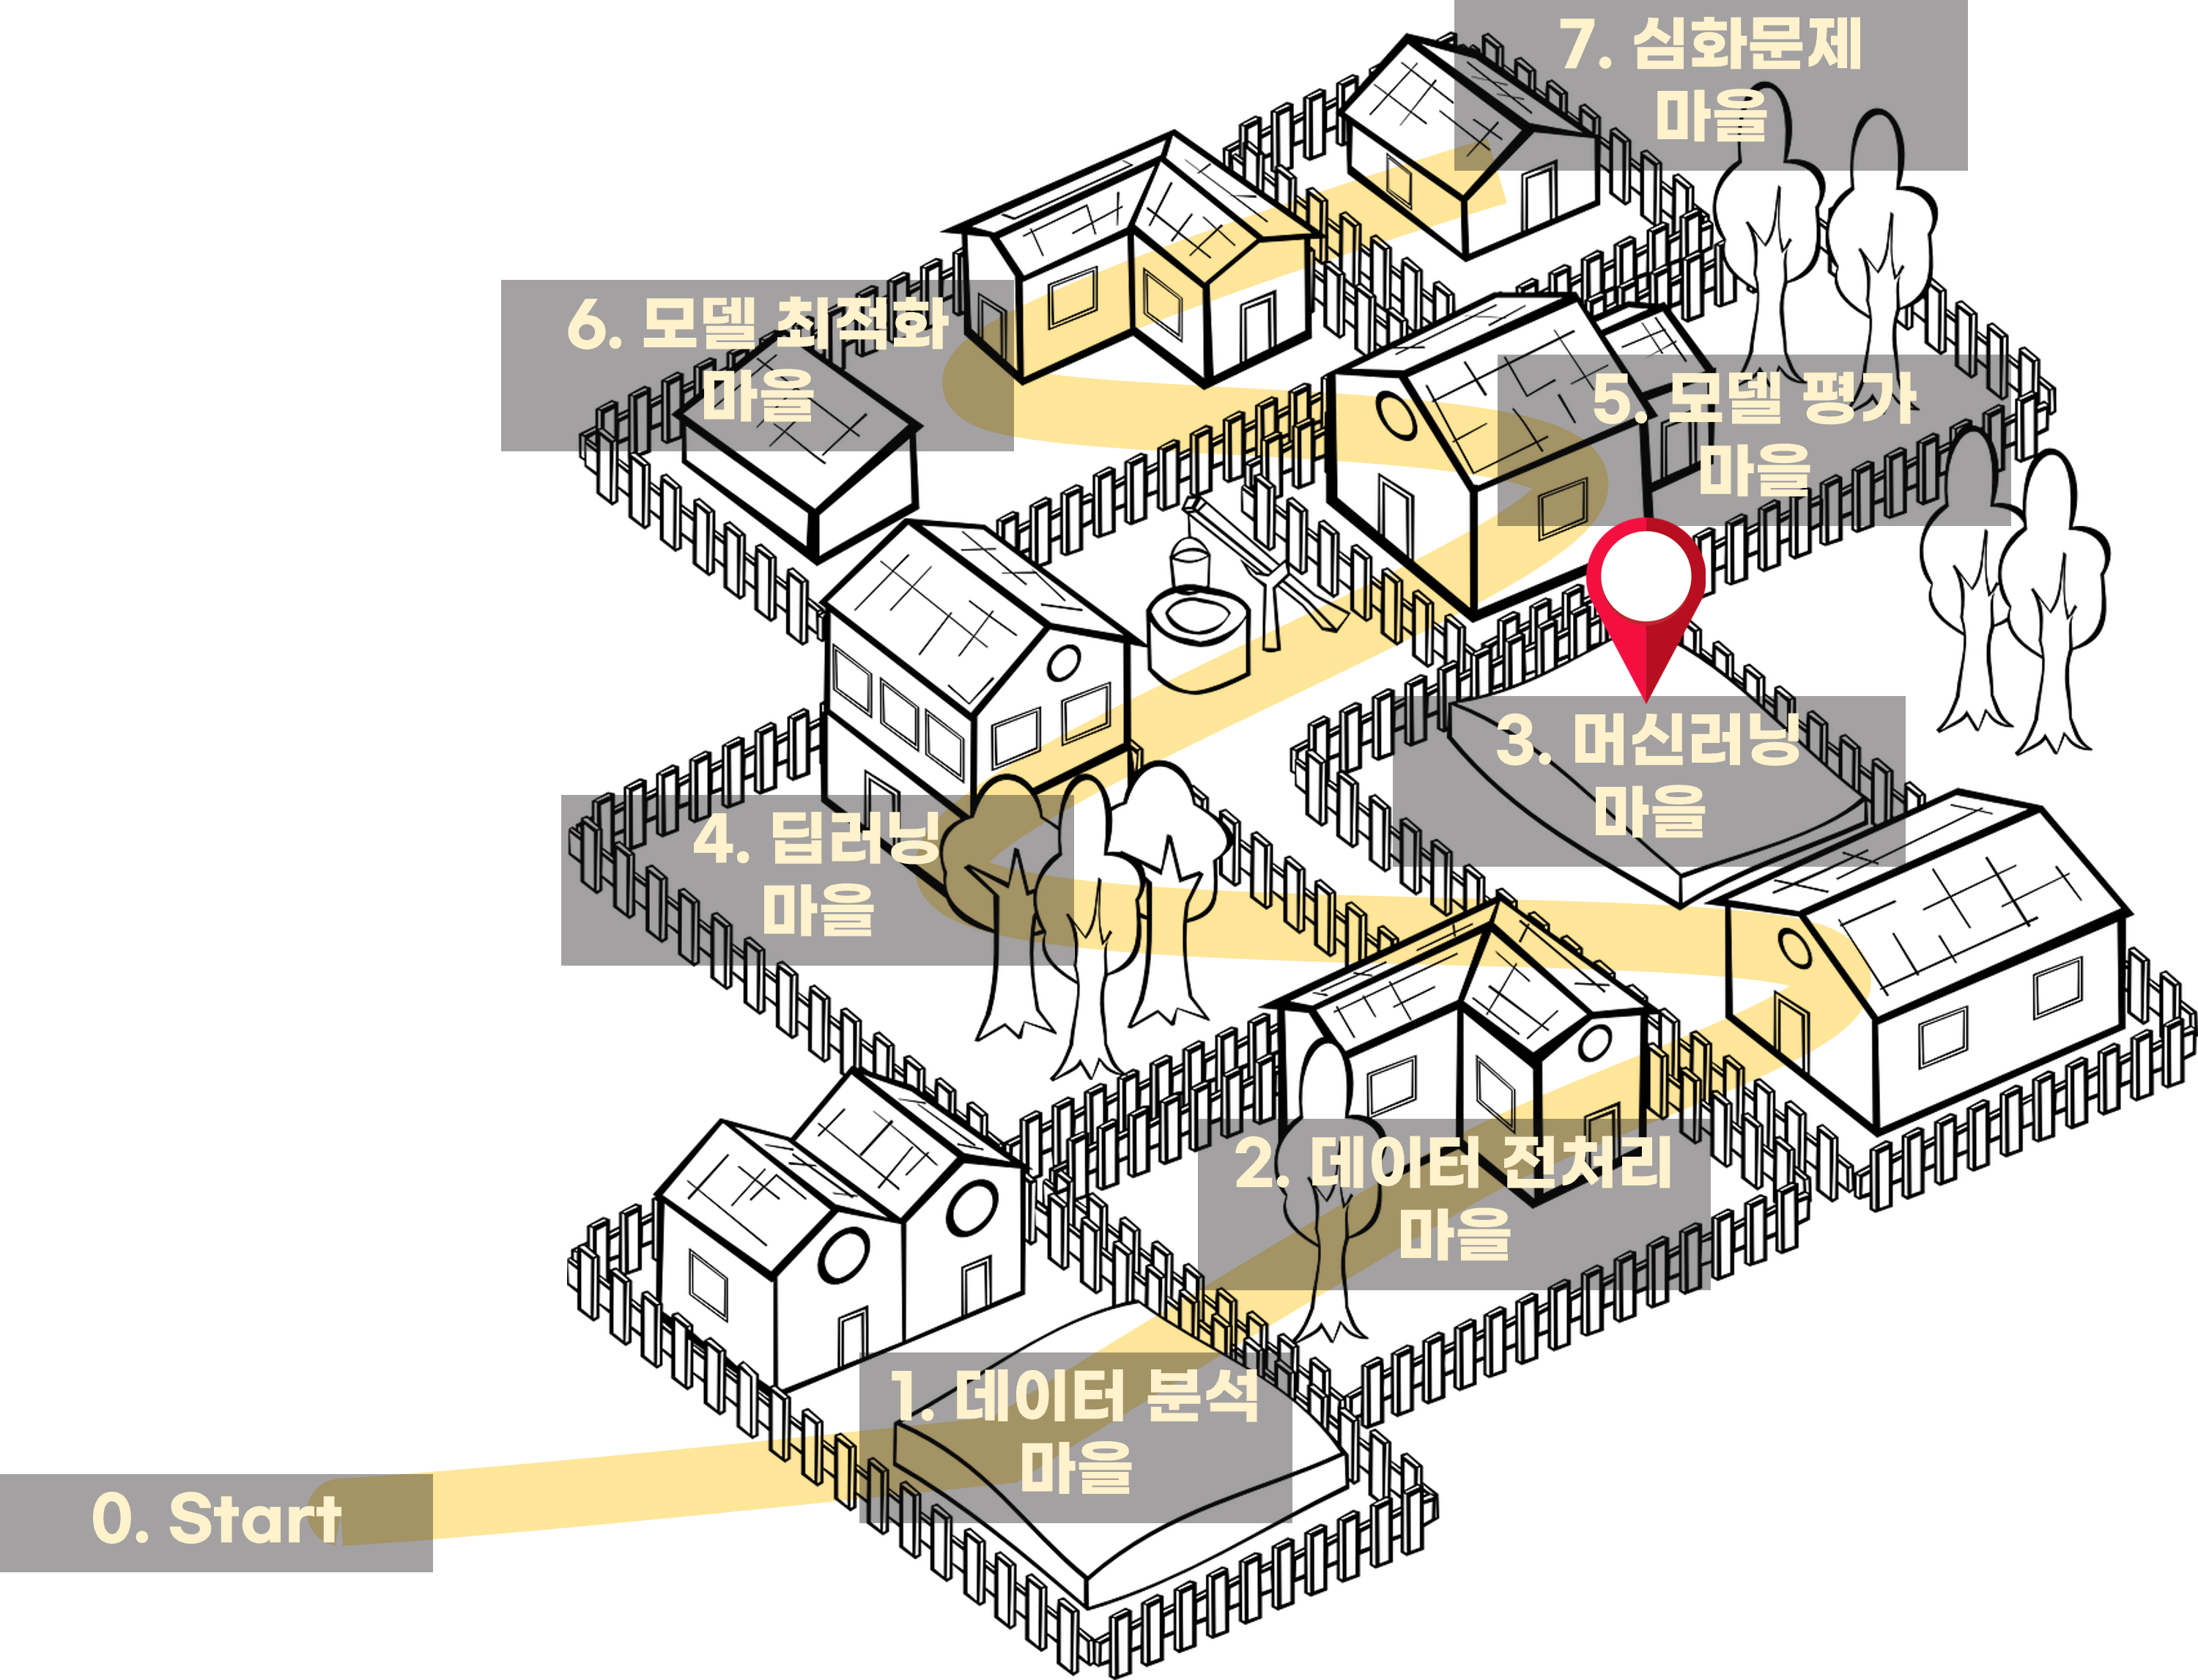

### [상황] 세 번째 드래곤볼을 찾아 보겠습니다. 
* 실습문제를 해결할 때마다 단서가 주어지는데요. 
* 이 단서를 기억해두었다가 마지막에 드래곤볼을 찾을 때 활용하시면 되요.

---

In [ ]:
# 필요 라이브러리부터 설치할께요.
!pip install pandas requests seaborn xgboost statsmodels gspread oauth2client

In [ ]:
# ID를 입력해주세요.
ID = "finalTest"

---

# (실습준비) 데이터 불러오기부터

In [ ]:
import pandas as pd

# 학습/평가 데이터 로딩
df_feature = pd.read_csv("add_data/onenavi_train_feature.csv",sep="|")
df_target = pd.read_csv("add_data/onenavi_train_target.csv",sep="|")

---

# 1. Train/Test Data Split
## Overfitting을 방지하기위해 우리는 데이터 셋을 분할합니다.
+ KeyPoint : 학습 대상으로 정제한 데이터를 Train/Test 데이터로 분할할 수 있다.

#### [실습문제1] 데이터 분할
* test데이터의 사이즈를 20%, random_state는 42로 데이터 셋을 분할해보세요.
* 변수명은 train_x, test_x, train_y, test_y로 지정
* 단서 : train_x 행(데이터) 수는?

In [ ]:
# 아래에 실습코드를 작성하세요.
from sklearn.model_selection import train_test_split

# train_test_split : 테스트 데이터 20%
train_x, test_x, train_y, test_y = train_test_split(df_feature, df_target, test_size=0.20, random_state=42)

print(len(train_x))

In [ ]:
# 아래에 단서를 적어주세요.
단서1 = "44346"# 단서1을 적어주세요.(문자형으로 적어주세요.)

---

In [ ]:
# 모델 저장을 위해 폴더를 생성하겠습니다.
import os
 
if not os.path.exists("model"):
    os.makedirs("model")

---

# 2. Modeling
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

[공식 Document]
* sklearn(https://scikit-learn.org/stable/user_guide.html)
* sklearn.linear_model.LinearRegression(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
* sklearn.ensemble.RandomForestRegressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* sklearn.ensemble.GradientBoostingRegressor(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)
* xgboost(https://xgboost.readthedocs.io/en/latest/)

[여기서 짚고 넘어갈 것!]
* 모델의 평가 기준은 RMSE와 R-squared Score로 한다.(다른 평가 기준도 있으나, 본 실습에서는 두 가지로 진행)
* RMSE(Root Mean Squared Error) : 그대로 직역하면 Error(예측 값-실제 값) 제곱의 평균에 루트한 값으로 모델의 예측 값과 실제 값의 차이를 표현
* R-squared Score : 우리말로 결정계수라고 할 수 있는데, 모델의 설명력을 이야기해주는 지표이다.1에 가까울수록 모델의 설명력이 높다고 할 수 있음

### 가. LinearRegression 부터 시작해봅시다.
#### 통계와 기계학습에서 사용되는 전통적인 기법

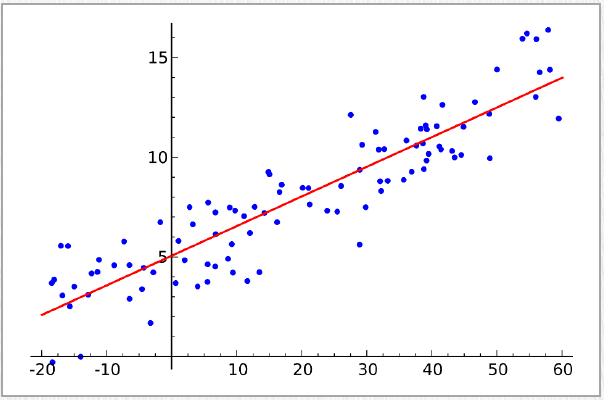

#### [실습문제2] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 지정하지 않습니다.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : sklearn의 LinearRegression 라이브러리에서 모델을 학습시키는데 활용되는 메소드는?(Hint : 맞추다)

In [ ]:
# 통계기법에서 LinearRegression
import statsmodels.api as sm

results = sm.OLS(train_y, train_x).fit()

results.summary()

# *** p<0.001, ** p<0.01, * p<0.05
# https://stats.stackovernet.xyz/ko/q/37406

In [ ]:
# 아래에 실습코드를 작성하세요.
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

model=lr()
model.fit(train_x, train_y)

print("모델의 회귀계수는 : ", model.coef_, "이고 모델의 절편은 : ",model.intercept_)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 아래에 단서를 적어주세요.
단서2 = "fit"# 단서2를 적어주세요.(문자형으로 적어주세요.)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언브스팅, XG부스팅을 활용해봅시다.

#### 본격적인 활용 이전에 앙상블 기법이 무엇인지 잠깐만 살펴보고 진행하겠습니다.
* 앙상블은 우리가 흔히 알고 있는 음악에서 사용되는 용어의 의미와 비슷하게 여러 모델을 이용해서 조화시키는 것으로 설명할 수 있습니다.
* 이를 통해 여러 모델의 장점을 모아 전반적인 오류를 줄여주고 각 모델의 한계를 극복할 수 있습니다.
* 앙상블은 크게 Bagging과 Boosting으로 구분해서 볼 수 있습니다.
* Bagging : Bootstrap Aggregating의 줄임말로 그대로 풀어보면 여러 개의 bootstrap을 생성하고 합쳐서(Aggregating) 최종 예측 모델을 산출하는 방법이다. 아래는 Bagging을 활용한 랜덤포레스트를 이해하기 쉽도록 도식화 한 것이다.
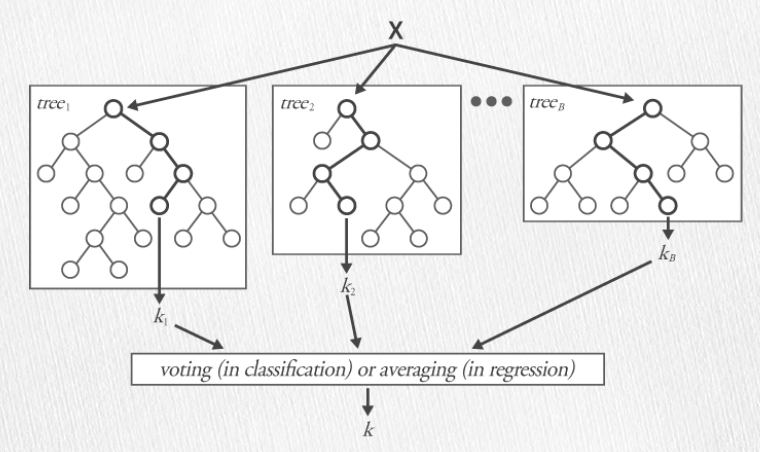
* Boosting : Bagging이 만든 여러 개의 bootstrap이 서로 영향을 주지 않는 병렬학습이라면 Boosting은 여러 모델을 순차적으로 학습해서 이전 모델의 결과를 바탕으로 다음 모델을 학습하는 기법이다. 이 과정을 통해 모델은 틀린 부분에 가중치를 부여하는 방식으로 오류를 더 잘 잡아낼 수 있도록 고안된 기법인데, Bagging과의 차이를 거칠게 표현하면 Bagging이 일반적인 모델을 여러개 생성하는데 집중한다면 Boosting은 정답을 찾기 어려운 문제에 집중한다고 할 수 있다. 아래는 부스팅을 이해하기 쉽게 도식화 한 것이다.
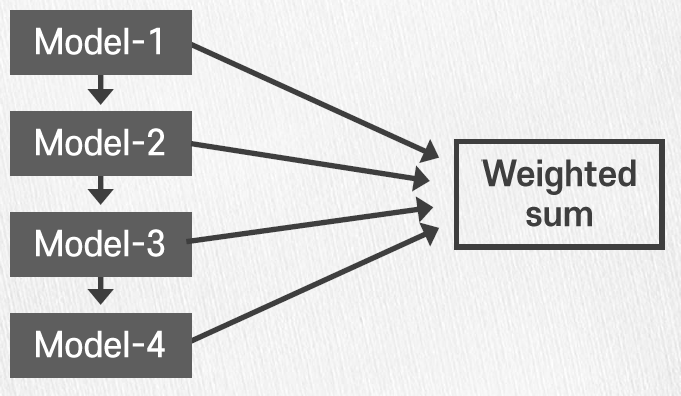

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

[주요 하이퍼 파라미터]
* n_estimators : 결정트리의 갯수를 지정하는 것인데, 많을 수록 좋은 결과 값을 기대할 수 있으나, 시간도 비례해서 증가할 수 있다는 것을 명심해야한다.(default 10)
* max_depth : 트리의 최대 깊이을 설정하는 것으로 많이 깊어질수록 과적합의 가능성이 높아진다.(default None)
* min_samples_split : 노드를 나눌 수 있는 최소 데이터 수(default 2)
* min_samples_leaf : 잎이 될 수 있는 최소 데이터 수(default 1)

#### [실습문제3] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42 로 지정해주세요.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : Test set의 R-squared Score는?

In [ ]:
# 아래에 실습코드를 작성하세요.
import numpy as np
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=rfr(n_estimators=100,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 아래에 단서를 적어주세요.
단서3 = "0.69942"# 단서3를 적어주세요.(문자형으로 적어주세요.)

#### [실습문제4] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
* 그리고 중요도 기준으로 상위 10위까지 변수를 정리해보세요.
* 단서 : 두번째로 중요한 변수는 무엇인가요?

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

rf_importances_values = model.feature_importances_
rf_importances = pd.Series(rf_importances_values, index = train_x.columns)
rf_top10 = rf_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=rf_top10, y=rf_top10.index,palette = "RdBu")
plt.show()

In [ ]:
# 아래에 단서를 적어주세요.
단서4 = "signaltype" # 단서4를 적어주세요.(문자형으로 적어주세요.)

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

[주요 하이퍼 파라미터]
* loss : 경사하강법에서 사용할 손실함수를 지정(default ls(Least Square))
* learning_rate : 말그대로 학습율이다. 기존의 예측 값에 대해 학습 결과를 얼마나 업데이트(보정)할지 지정(default 0.1)
* n_estimators : 부스팅 단계의 갯수를 지정하는 것인데, 많을 수록 좋은 결과 값을 기대할 수 있으나, 시간도 비례해서 증가할 수 있다는 것을 명심해야한다.(default 10)
* max_depth : 트리의 최대 깊이을 설정하는 것으로 많이 깊어질수록 과적합의 가능성이 높아진다.(default None)
* min_samples_split : 노드를 나눌 수 있는 최소 데이터 수(default 2)
* min_samples_leaf : 잎이 될 수 있는 최소 데이터 수(default 1)

#### [실습문제5] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42 로 지정해주세요.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : Test set의 RMSE는?

In [ ]:
# 아래에 실습코드를 작성하세요.
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor as grb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=grb(n_estimators=100,learning_rate=0.1,max_depth=5,min_samples_split=30,min_samples_leaf=15,random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 아래에 단서를 적어주세요.
단서5 = "276.47308"# 단서5를 적어주세요.(문자형으로 적어주세요.)

#### [실습문제6] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
* 그리고 중요도 기준으로 상위 10위까지 변수를 정리해보세요.
* 단서 : 세번째로 중요한 변수는 무엇인가요?

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

grb_importances_values = model.feature_importances_
grb_importances = pd.Series(grb_importances_values, index = train_x.columns)
grb_top10 = grb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=grb_top10, y=grb_top10.index,palette = "RdBu")
plt.show()

In [ ]:
# 아래에 단서를 적어주세요.
단서6 = "A_DISTANCE"# 단서6을 적어주세요.(문자형으로 적어주세요.) A_DISTANCE

#### 3) XGBoost
##### 부스팅 모델이 매우 강력한 것은 사실이지만 단점도 존재(느리고, 과적합의 이슈), 그래서 GradientBoosting보다 빠르고 규제를 설정해서 과적합 방지가 가능한 XGBoost가 등장

[주요 하이퍼 파라미터]
* booster : 사용할 부스터(default gbtree)
* gamma : 가지를 칠 때 필요한 최소손실 감소로 클수록 보수적(가지를 치지 않는다)이라고 할 수 있다.(default 0)
* eta : 말그대로 학습율이다. 기존의 예측 값에 대해 학습 결과를 얼마나 업데이트(보정)할지 지정(default 0.3)
* n_estimators : 부스팅 단계의 갯수를 지정하는 것인데, 많을 수록 좋은 결과 값을 기대할 수 있으나, 시간도 비례해서 증가할 수 있다는 것을 명심해야한다.(default 100)
* max_depth : 트리의 최대 깊이을 설정하는 것으로 많이 깊어질수록 과적합의 가능성이 높아진다.(default 6)
* reg_lambda : 가중치에 대한 L2 정규화(default 1), 커질수록 오버피팅 방지, 너무 큰 가중치를 줄여줄 수 있음
* reg_alpha : 가중치에 대한 L1 정규화(default 0), 커질수록 오버피팅 방지, 불필요한 가중치를 0으로 만들어서 무시
* [참고] https://developers.google.com/machine-learning/crash-course/regularization-for-sparsity/l1-regularization?hl=ko
* early_stopping_rounds : 조기 종료 옵션, 지정 횟수 동안 결과가 개선 되지 않으면 조기 종료 한다.

#### [실습문제7] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 XG부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 이때 모델의 파라미터는 n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5,random_state=42 으로 지정해주세요.
* 그리고 RMSE와 R-squared Score를 계산하세요.(소수점 5째자리까지, 반올림)
* 단서 : Test set의 R-squared Score는?

In [ ]:
# 아래에 실습코드를 작성하세요.
import numpy as np
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model=xgb(n_estimators=100,gamma=1,eta=0.1,max_depth=5,reg_lambda=5,reg_alpha=5,random_state=42)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)
print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))

In [ ]:
# 아래에 단서를 적어주세요.
단서7 = "0.71666"# 단서7을 적어주세요.(문자형으로 적어주세요.) 0.71666

#### [실습문제8] 머신러닝_7
* XG부스팅으로 학습한 모델의 feature_importances를 구해보세요.
* 그리고 중요도 기준으로 상위 10위까지 변수를 정리해보세요.
* 단서 : 세번째로 중요한 변수는 무엇인가요?

In [ ]:
# Feature의 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns

xgb_importances_values = model.feature_importances_
xgb_importances = pd.Series(xgb_importances_values, index = train_x.columns)
xgb_top10 = xgb_importances.sort_values(ascending=False)[:10]

plt.rcParams["font.family"] = 'NanumGothicCoding'
plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=xgb_top10, y=xgb_top10.index,palette = "RdBu")
plt.show()

In [ ]:
# 아래에 단서를 적어주세요.
단서8 = "HOUR_7" # 단서8을 적어주세요.(문자형으로 적어주세요.) HOUR_7

#### [실습문제9] 머신러닝_8
* 위에서 실습한 4개의 모델(LinearRegression, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor)를 모델링한 후 각각의 모델 파일로 저장해주세요.
* 저장위치는 model 폴더입니다.
* 파일명은 LinearRegression : model_0.pkl, RandomForestRegressor: model_1.pkl, GradientBoostingRegressor: model_2.pkl, XGBRegressor: model_3.pkl 입니다.
* 이때 모델의 파라미터는 지정하지 않습니다.
* 단서 : pkl 파일을 저장하는데 도움을 주는 라이브러리 이름은? Hint : j로 시작하는 라이브러리

In [ ]:
# 아래에 실습코드를 작성하세요. 모델을 저장할 때는 다른 모델과 이름이 겹치지 않도록 다르게 저장해주세요.
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grb
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

import joblib
import time

model_list=[
            lr(),
            rfr(),
            grb(),
            xgb()
            ]

# 다차원 배열을 1차원으로 평평하게 만들어주기!
train_y = np.ravel(train_y, order='C')

model_rslt = []
for i in range(len(model_list)):
    start_time = time.process_time()
    model = model_list[i]
    model.fit(train_x, train_y)
    end_time = time.process_time()
    joblib.dump(model, 'model/{}_model.pkl'.format(i)) # 모델 저장, sklearn을 통해서 만들어진 모델은 pkl 파일로 저장
    print(f"* {model} 결과 시작")
    print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))
    pred_y = model.predict(test_x)
    model_rslt.append(model)
    print("RMSE on Test set : {0:.5f}".format(mean_squared_error(test_y,pred_y)**0.5))
    print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_y,pred_y)))
    print("---------------------------------------------------------------------------")

In [ ]:
# 아래에 단서를 적어주세요.
단서9 = "joblib"# 단서9를 적어주세요.(문자형으로 적어주세요.)

---

### [드래곤볼을 찾아라] 주어진 단서를 모아서 드래곤볼을 찾아보겠습니다.
* 소스코드 실행 후 드래곤볼 이미지 창이 열리고 "드래곤볼을 찾았습니다."라는 문구가 출력된다면 여러분은 드래곤볼을 찾은 거랍니다.

In [ ]:
# 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.
import module

module.thirdModule(ID, 단서1, 단서2, 단서3, 단서4, 단서5, 단서6, 단서7, 단서8, 단서9)

In [ ]:
# 확인
from IPython.display import Image
Image("./dragonball/3성구.png", width=300, height=300)